# 02 "Tselluloositehas" kogumine Delfi veebilehelt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud
from estnltk import Text
import re

Delfi veebilehtelt koguti veebiämblikuga uudisartiklite lingid. Kogutud lingid on failis:  delfiscraper/delfiscraper/spiders/delfi_lingid_tselluloositehas.csv
Linkide kogumiseks kasutatud valikukriteeriumid:

https://old.delfi.ee/archive/?tod=18.03.2022&fromd=01.01.2016&channel=1&category=0&query=tselluloositehas
1) periood: 01.01.2016 – 18.03.2022

2) kanal: Delfi

3) kategooria: kõik

In [2]:
# Delfi veebilehelt veebiämblikuga kogutud lingid loetakse listi

# list Delfi linkide jaoks
urls_delfi_toor = []

with open('delfiscraper/delfiscraper/spiders/delfi_lingid_tselluloositehas.csv', 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for line in reader:
        if line != []:
            urls_delfi_toor.append(line[0])
# linkide failis esimene rida ei ole uudise link
print(len(urls_delfi_toor)-1)

86


In [3]:
# võimalike topeltlinkide eemaldamine
urls_delfi = list(dict.fromkeys(urls_delfi_toor))
print("Delfi veebilehtedelt kogutud linkide arv: ", len(urls_delfi)-1)

Delfi veebilehtedelt kogutud linkide arv:  86


Delfi veebilehtedelt kogutud linkidelt saadakse BeautifulSoup abil järgmine info:

1) väljaande nimi

2) artikli pealkiri

3) artikli tekst

4) artikli publitseerimise kuupäev

In [4]:
headers = requests.utils.default_headers()
headers.update(
  { 'User-Agent': 'my crawler (anneliis@ut.ee) / on studying purpose', }
)

pealkirjad = []
tekstid = []
väljaanded = []
ajad =[]

for url in tqdm(urls_delfi[1:]):
  
    try:
        yhendatud_tekst = []
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        väljaanne = soup.find("meta", {"property" :"og:site_name"})['content']
        print(väljaanne)

        pealkiri = soup.find("meta", {"property" :"og:title"})['content']
        
        #artik = "article__body"
        artik = "G-col-article"
        publits = {"name": "cXenseParse:recs:publishtime"}
        #publits = {"property" : "article:published_time"}
                    
        tekst = soup.findAll("div",{"class" : artik})

        for t in tekst:
            p = t.find_all('p')
            for r in p:
                yhendatud_tekst.append(r.text)
          
        tekstid.append(yhendatud_tekst)

        aeg = soup.find("meta", publits)['content']
        
    except Exception as e:
        print("Exception is :", e, url)
        
    pealkirjad.append(pealkiri)
    väljaanded.append(väljaanne)
    ajad.append(aeg)
    artikkel = [' '.join(article) for article in tekstid]

  1%|▉                                                                                  | 1/86 [00:01<02:05,  1.48s/it]

Maaleht


  2%|█▉                                                                                 | 2/86 [00:01<01:35,  1.13s/it]

Maaleht


  3%|██▉                                                                                | 3/86 [00:03<01:53,  1.37s/it]

Eesti Päevaleht


  5%|███▊                                                                               | 4/86 [00:05<01:53,  1.39s/it]

Eesti Päevaleht


  6%|████▊                                                                              | 5/86 [00:05<01:37,  1.21s/it]

Delfi


  7%|█████▊                                                                             | 6/86 [00:07<01:42,  1.28s/it]

Ärileht


  8%|██████▊                                                                            | 7/86 [00:07<01:19,  1.00s/it]

Maaleht


  9%|███████▋                                                                           | 8/86 [00:09<01:25,  1.09s/it]

Eesti Päevaleht


 10%|████████▋                                                                          | 9/86 [00:09<01:07,  1.14it/s]

Eesti Ekspress


 12%|█████████▌                                                                        | 10/86 [00:09<00:54,  1.39it/s]

Maaleht


 13%|██████████▍                                                                       | 11/86 [00:10<00:46,  1.62it/s]

Eesti Ekspress


 14%|███████████▍                                                                      | 12/86 [00:10<00:40,  1.85it/s]

Eesti Ekspress


 15%|████████████▍                                                                     | 13/86 [00:11<00:57,  1.26it/s]

Delfi


 16%|█████████████▎                                                                    | 14/86 [00:13<01:11,  1.01it/s]

Eesti Ekspress


 17%|██████████████▎                                                                   | 15/86 [00:13<00:56,  1.25it/s]

Maaleht


 19%|███████████████▎                                                                  | 16/86 [00:15<01:19,  1.13s/it]

Delfi


 20%|████████████████▏                                                                 | 17/86 [00:17<01:43,  1.50s/it]

Delfi


 21%|█████████████████▏                                                                | 18/86 [00:18<01:29,  1.31s/it]

Eesti Ekspress


 22%|██████████████████                                                                | 19/86 [00:19<01:08,  1.03s/it]

Maaleht


 23%|███████████████████                                                               | 20/86 [00:20<01:11,  1.09s/it]

Eesti Ekspress


 24%|████████████████████                                                              | 21/86 [00:20<00:57,  1.13it/s]

Maaleht


 26%|████████████████████▉                                                             | 22/86 [00:22<01:09,  1.08s/it]

Delfi


 27%|█████████████████████▉                                                            | 23/86 [00:22<00:55,  1.13it/s]

Maaleht


 28%|██████████████████████▉                                                           | 24/86 [00:24<01:17,  1.24s/it]

Delfi


 29%|███████████████████████▊                                                          | 25/86 [00:26<01:26,  1.42s/it]

Delfi


 30%|████████████████████████▊                                                         | 26/86 [00:28<01:32,  1.54s/it]

Delfi


 31%|█████████████████████████▋                                                        | 27/86 [00:30<01:39,  1.69s/it]

Delfi


 33%|██████████████████████████▋                                                       | 28/86 [00:32<01:40,  1.73s/it]

Delfi


 34%|███████████████████████████▋                                                      | 29/86 [00:32<01:14,  1.30s/it]

Maaleht


 35%|████████████████████████████▌                                                     | 30/86 [00:32<00:55,  1.00it/s]

Maaleht


 36%|█████████████████████████████▌                                                    | 31/86 [00:34<01:06,  1.21s/it]

Delfi


 37%|██████████████████████████████▌                                                   | 32/86 [00:36<01:15,  1.40s/it]

Eesti Ekspress


 38%|███████████████████████████████▍                                                  | 33/86 [00:38<01:19,  1.49s/it]

Eesti Ekspress


 40%|████████████████████████████████▍                                                 | 34/86 [00:38<01:00,  1.16s/it]

Maaleht


 41%|█████████████████████████████████▎                                                | 35/86 [00:39<01:01,  1.21s/it]

Delfi


 42%|██████████████████████████████████▎                                               | 36/86 [00:41<01:07,  1.34s/it]

Delfi


 43%|███████████████████████████████████▎                                              | 37/86 [00:44<01:22,  1.69s/it]

Delfi


 44%|████████████████████████████████████▏                                             | 38/86 [00:45<01:19,  1.66s/it]

Eesti Päevaleht


 45%|█████████████████████████████████████▏                                            | 39/86 [00:48<01:30,  1.93s/it]

Eesti Ekspress


 47%|██████████████████████████████████████▏                                           | 40/86 [00:50<01:28,  1.92s/it]

Delfi


 48%|███████████████████████████████████████                                           | 41/86 [00:52<01:26,  1.92s/it]

Maaleht


 49%|████████████████████████████████████████                                          | 42/86 [00:53<01:18,  1.78s/it]

Delfi


 50%|█████████████████████████████████████████                                         | 43/86 [00:55<01:12,  1.69s/it]

Delfi


 51%|█████████████████████████████████████████▉                                        | 44/86 [00:57<01:16,  1.82s/it]

Delfi


 52%|██████████████████████████████████████████▉                                       | 45/86 [00:59<01:21,  1.99s/it]

Eesti Ekspress


 53%|███████████████████████████████████████████▊                                      | 46/86 [01:00<01:12,  1.81s/it]

Eesti Ekspress


 55%|████████████████████████████████████████████▊                                     | 47/86 [01:02<01:06,  1.72s/it]

Delfi


 56%|█████████████████████████████████████████████▊                                    | 48/86 [01:04<01:06,  1.76s/it]

Delfi


 57%|██████████████████████████████████████████████▋                                   | 49/86 [01:05<01:04,  1.73s/it]

Delfi


 58%|███████████████████████████████████████████████▋                                  | 50/86 [01:07<00:58,  1.63s/it]

Eesti Päevaleht


 59%|████████████████████████████████████████████████▋                                 | 51/86 [01:08<00:53,  1.53s/it]

Delfi


 60%|█████████████████████████████████████████████████▌                                | 52/86 [01:10<00:50,  1.50s/it]

Maaleht


 62%|██████████████████████████████████████████████████▌                               | 53/86 [01:11<00:49,  1.49s/it]

Delfi


 63%|███████████████████████████████████████████████████▍                              | 54/86 [01:12<00:46,  1.45s/it]

Eesti Ekspress


 64%|████████████████████████████████████████████████████▍                             | 55/86 [01:14<00:45,  1.46s/it]

Eesti Ekspress


 65%|█████████████████████████████████████████████████████▍                            | 56/86 [01:16<00:46,  1.56s/it]

Maaleht


 66%|██████████████████████████████████████████████████████▎                           | 57/86 [01:17<00:45,  1.57s/it]

Eesti Ekspress


 67%|███████████████████████████████████████████████████████▎                          | 58/86 [01:19<00:45,  1.63s/it]

Delfi


 69%|████████████████████████████████████████████████████████▎                         | 59/86 [01:21<00:43,  1.60s/it]

Delfi


 70%|█████████████████████████████████████████████████████████▏                        | 60/86 [01:22<00:43,  1.65s/it]

Maaleht


 71%|██████████████████████████████████████████████████████████▏                       | 61/86 [01:24<00:38,  1.53s/it]

Maaleht


 72%|███████████████████████████████████████████████████████████                       | 62/86 [01:26<00:46,  1.94s/it]

Eesti Ekspress


 73%|████████████████████████████████████████████████████████████                      | 63/86 [01:28<00:42,  1.84s/it]

Maaleht


 74%|█████████████████████████████████████████████████████████████                     | 64/86 [01:30<00:42,  1.92s/it]

Maaleht


 76%|█████████████████████████████████████████████████████████████▉                    | 65/86 [01:32<00:37,  1.81s/it]

Delfi


 77%|██████████████████████████████████████████████████████████████▉                   | 66/86 [01:32<00:27,  1.37s/it]

Ärileht


 78%|███████████████████████████████████████████████████████████████▉                  | 67/86 [01:34<00:28,  1.51s/it]

Delfi


 79%|████████████████████████████████████████████████████████████████▊                 | 68/86 [01:34<00:20,  1.16s/it]

Ärileht


 80%|█████████████████████████████████████████████████████████████████▊                | 69/86 [01:36<00:22,  1.31s/it]

Delfi


 81%|██████████████████████████████████████████████████████████████████▋               | 70/86 [01:37<00:21,  1.34s/it]

Delfi


 83%|███████████████████████████████████████████████████████████████████▋              | 71/86 [01:40<00:25,  1.72s/it]

Delfi


 84%|████████████████████████████████████████████████████████████████████▋             | 72/86 [01:41<00:23,  1.65s/it]

Eesti Päevaleht


 85%|█████████████████████████████████████████████████████████████████████▌            | 73/86 [01:43<00:21,  1.62s/it]

Eesti Ekspress


 86%|██████████████████████████████████████████████████████████████████████▌           | 74/86 [01:44<00:18,  1.55s/it]

Eesti Ekspress


 87%|███████████████████████████████████████████████████████████████████████▌          | 75/86 [01:46<00:16,  1.50s/it]

Delfi


 88%|████████████████████████████████████████████████████████████████████████▍         | 76/86 [01:47<00:14,  1.47s/it]

Eesti Ekspress


 90%|█████████████████████████████████████████████████████████████████████████▍        | 77/86 [01:48<00:12,  1.40s/it]

Eesti Ekspress


 91%|██████████████████████████████████████████████████████████████████████████▎       | 78/86 [01:50<00:11,  1.43s/it]

Eesti Ekspress


 92%|███████████████████████████████████████████████████████████████████████████▎      | 79/86 [01:52<00:10,  1.53s/it]

Eesti Ekspress


 93%|████████████████████████████████████████████████████████████████████████████▎     | 80/86 [01:53<00:09,  1.62s/it]

Maaleht


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 81/86 [01:55<00:08,  1.64s/it]

Eesti Ekspress


 95%|██████████████████████████████████████████████████████████████████████████████▏   | 82/86 [01:57<00:06,  1.65s/it]

Maaleht


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 83/86 [01:57<00:03,  1.26s/it]

Eesti Ekspress


 98%|████████████████████████████████████████████████████████████████████████████████  | 84/86 [01:58<00:02,  1.28s/it]

Delfi


 99%|█████████████████████████████████████████████████████████████████████████████████ | 85/86 [02:00<00:01,  1.49s/it]

Maaleht


100%|██████████████████████████████████████████████████████████████████████████████████| 86/86 [02:01<00:00,  1.41s/it]

Maaleht


Kogutud info uudisartiklite kohta koondatakse sõnastikuks.

In [5]:
artiklid = {'title': pealkirjad, 'text': artikkel,'subject': väljaanded, 'date': ajad, 'link': urls_delfi[1:]}

Kogutud sõnastik esitatakse tabeli kujul. Tabelis on viis veergu:

1) artikli pealkiri

2) artikli tekst

3) artikli väljaandja

4) artikli publitseerimise kuupäev

5) artikli link

In [6]:
data_delfi = pd.DataFrame(artiklid, columns = ['title', 'text','subject', 'date', 'link'])

In [7]:
data_delfi.shape

(86, 5)

In [8]:
data_delfi

title  \
0                 Soome puidukontserni UPM asepresident Kaido Kukk: puidukeemia pole kaugeltki vaid WC-paber Hiina turule   
1   Kohtla-Järve veerele planeeritav tselluloositehas annaks põlevkivikaevuritele töö ja tuleviku, aga mida saaks teised?   
2                                  Kliimaeesmärgid panevad suure trahvi ähvardusega Eesti metsa langetamisele piirid ette   
3                                                Kristina Kallas: Ratase teine valitsus on veel hullem kui Reformierakond   
4                                             Kirju karjääriga ekssuusatajast Kaspar Kokkast on saanud Isamaa suursponsor   
..                                                                                                                    ...   
81                                                 Uue puidutehase rajajad ja teadlased näevad Eestile suurt majanduskasu   
82                                                                                                 Mets on eestlase kirik   
83                           Halduskohus ei hoolinud kodanikuühenduse kaebusest hiid-tselluloositehase planeerimise asjus   
84                                                               Vastsed tehased suurendavad puidutööstuse toormevajadust   
85                                       Tselluloositehase ehitamine Eestisse seaks meie metsad veelgi suurema löögi alla   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

subject
Delfi              32
Eesti Ekspress     23
Eesti Päevaleht     6
Maaleht            20
Ärileht             3
Name: text, dtype: int64


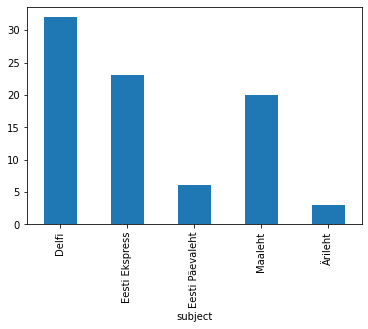

In [13]:
# Artiklite jaotus väljaandjate kaupa
print(data_delfi.groupby(['subject'])['text'].count())
data_delfi.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [16]:
data_delfi.to_csv('data_delfi_tselluloositehas.csv',index=False)

In [17]:
read_file = pd.read_csv (r'data_delfi_tselluloositehas.csv')
read_file.to_excel (r'data_delfi_tselluloositehas.xlsx', index = None, header=True)